In [1]:
import scanpy as sc #for scanpy >= 1.3.7
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

import seaborn as sns

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.0


In [23]:
#path = "/home/burt/Documents/projects/2020/tcell_scRNAseq/output/"
path = "C:/Users/Philipp/OneDrive/projects/2020/tcell_scRNAseq/output/"
df_xin = pd.read_csv(path+"variance_xin_2018.csv")
df_xin_s = pd.read_csv(path+ "variance_xin_2018_seurat.csv")

df_ciucci = pd.read_csv(path+"variance_ciucci_2019.csv")
df_ciucci_s = pd.read_csv(path+"variance_ciucci_2019_seurat.csv")

df_magen = pd.read_csv(path+"variance_magen_2019.csv")
df_magen_s = pd.read_csv(path+"variance_magen_2019_seurat.csv")

studies = ["xin2018", "ciucci2019", "magen2019"]
df_sc = [df_xin, df_ciucci, df_magen]
df_seu = [df_xin_s, df_ciucci_s, df_magen_s]

for df, study in zip(df_sc, studies):
    df["study"] = study
    df["norm."] = "scanpy"

for df, study in zip(df_seu, studies):
    df["study"] = study
    df["norm."] = "sctransform"

    
df = pd.concat(df_sc)
df_seu = pd.concat(df_seu)

In [24]:
df

,Unnamed: 0,highly_variable,means,dispersions,dispersions_norm,study,norm.
0,Mrpl15,False,4.290617e+00,5.893086,-0.549662,xin2018,scanpy
1,Lypla1,False,4.402143e+00,5.888394,-0.570957,xin2018,scanpy
2,Tcea1,False,4.576232e+00,6.007034,-0.032443,xin2018,scanpy
3,Atp6v1h,False,3.919477e+00,5.991584,-0.117001,xin2018,scanpy
4,Rb1cc1,False,3.870633e+00,5.931024,-0.446157,xin2018,scanpy
...,...,...,...,...,...,...,...
27993,AC168977.1,False,9.744464e-01,5.341076,0.203066,magen2019,scanpy
27994,PISD,True,3.958412e+00,5.534815,1.272976,magen2019,scanpy
27995,DHRSX,False,4.070499e+00,5.308802,-0.116740,magen2019,scanpy
27996,Vmn2r122,False,1.000000e-12,NaN,NaN,magen2019,scanpy


<ipython-input-27-df64dc01c1a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["dispersion_log"] = np.log2(df2.dispersions_norm)


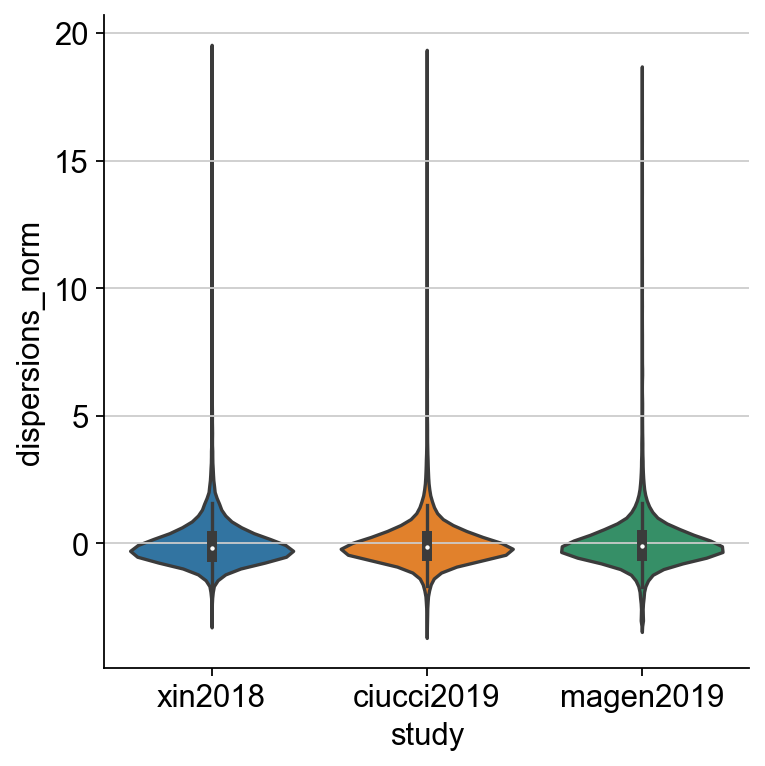

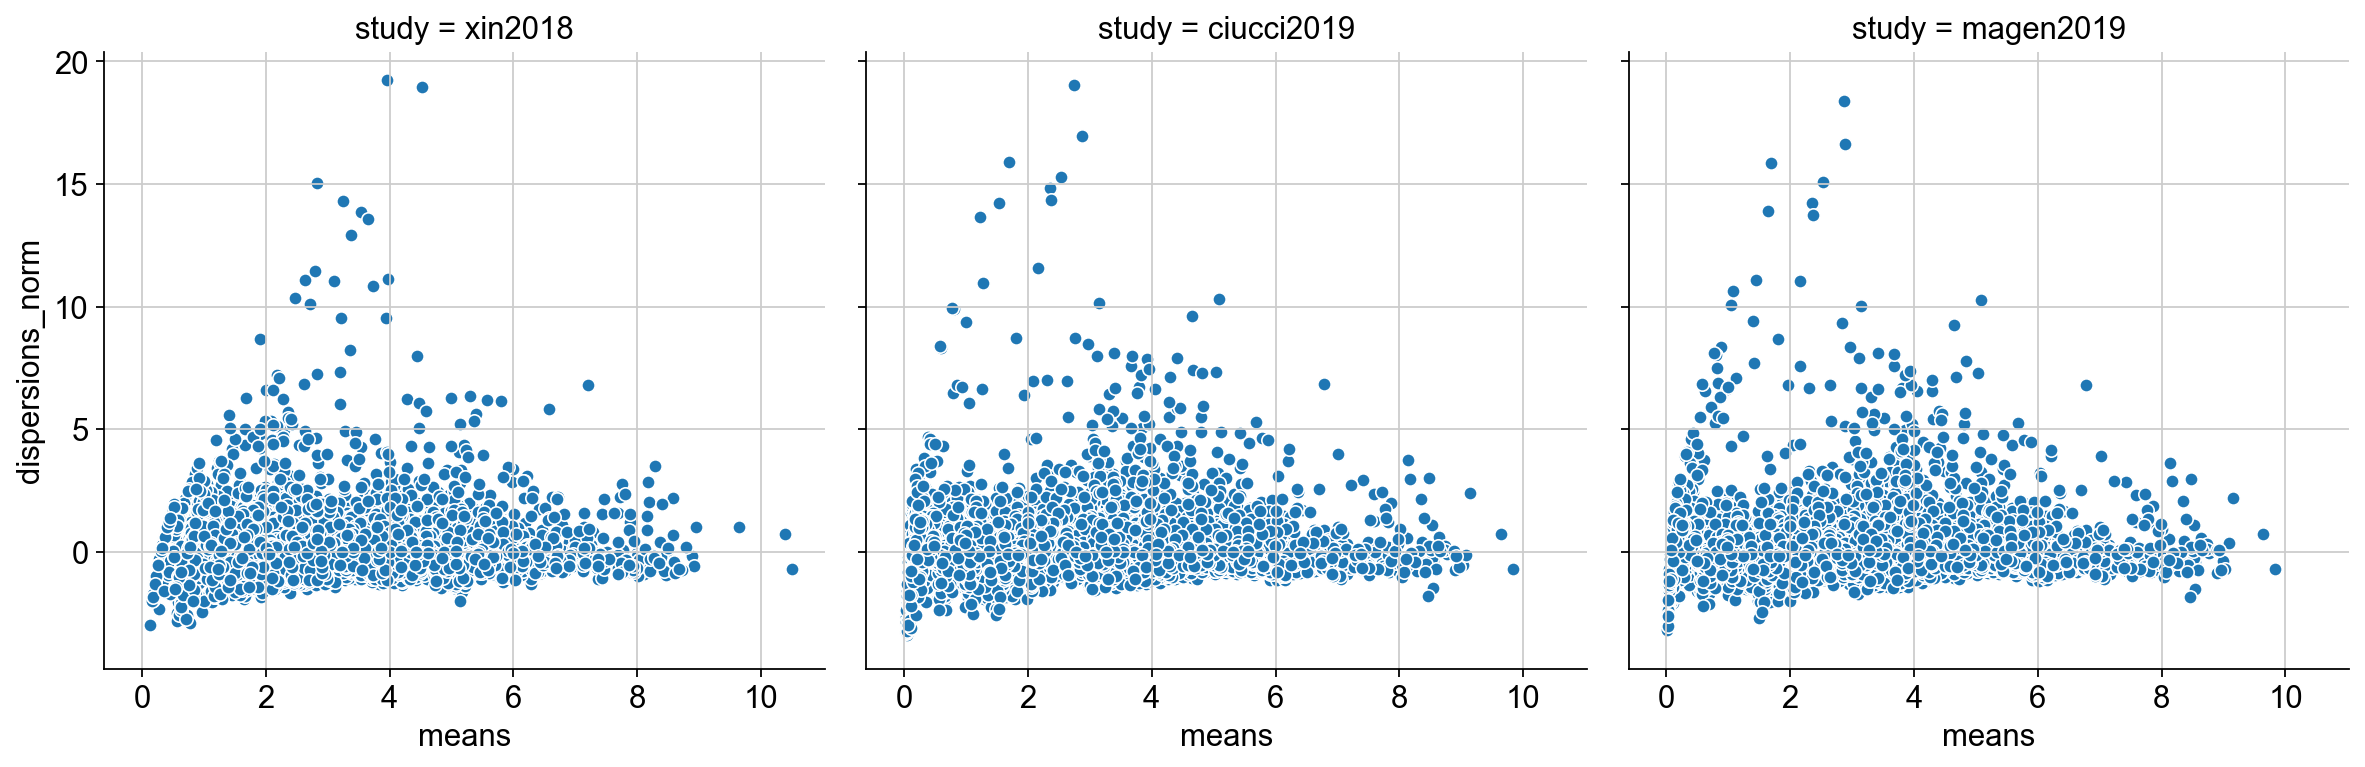

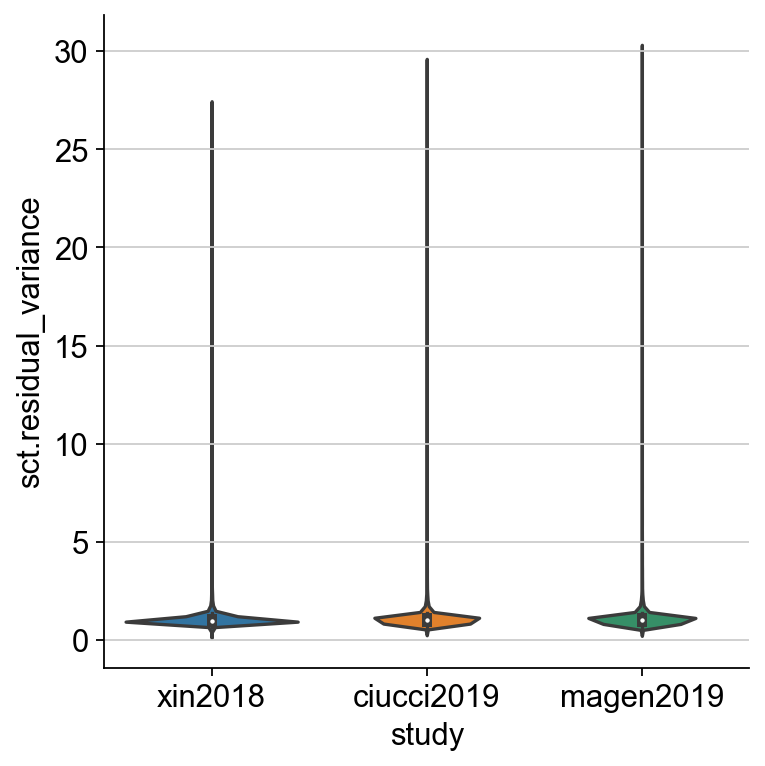

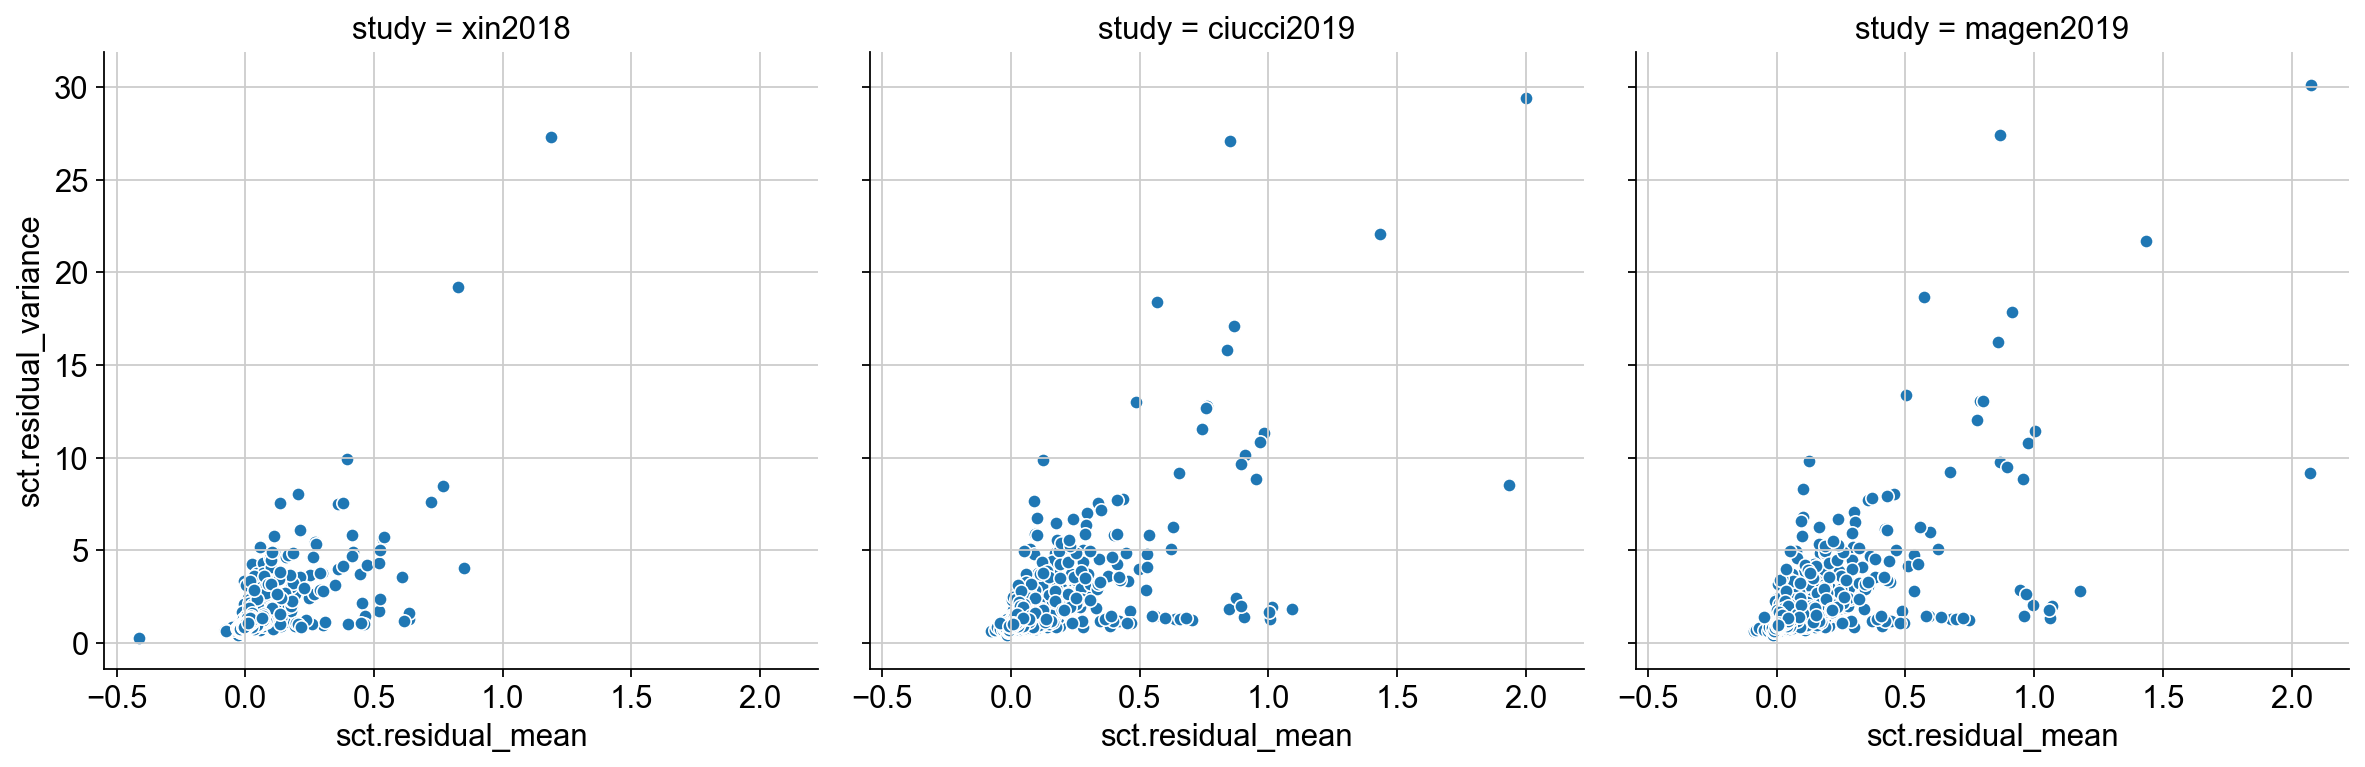

In [27]:
df2 = df[df.highly_variable == True]
df2["dispersion_log"] = np.log2(df2.dispersions_norm)

g = sns.catplot(data = df, x = "study", y = "dispersions_norm", kind = "violin")
g = sns.relplot(data = df, x = "means", y = "dispersions_norm", col = "study")


df_seu_clipped = df_seu[df_seu["sct.residual_variance"] < 60]
g = sns.catplot(data = df_seu_clipped, x = "study", y = "sct.residual_variance", kind = "violin")

# clip outliers!

g = sns.relplot(data = df_seu_clipped, x = "sct.residual_mean", y = "sct.residual_variance", col = "study")